# Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Data/fake_job_postings.csv')

In [3]:
df.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Dimensions
df.shape

(17880, 18)

This data set has 17880 rows, 18 columns.

- job_id
- title
- location
- department
- salary_range
- company_profile
- description
- requirements
- benefit
- telecommuting
- has_company_logo
- has_question
- employment_type
- required_experience
- required_education
- industry
- function
- fraudulent

In [6]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

There are 800 fake job posts in the dataset. Most of the data is catgorical/textual data.

In [7]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [8]:
df.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [9]:
df.corr(numeric_only=True)

job_id  telecommuting  has_company_logo  has_questions  \
job_id            1.000000      -0.004559         -0.014539      -0.087025   
telecommuting    -0.004559       1.000000         -0.019836       0.020345   
has_company_logo -0.014539      -0.019836          1.000000       0.233932   
has_questions    -0.087025       0.020345          0.233932       1.000000   
fraudulent        0.079872       0.034523         -0.261971      -0.091627   

                  fraudulent  
job_id              0.079872  
telecommuting       0.034523  
has_company_logo   -0.261971  
has_questions      -0.091627  
fraudulent          1.000000

# Dealing with missing values

In [10]:
# Check for missing values
df.isnull().sum()


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
# Percentage of missing values by column
df.isnull().sum() / df.shape[0] * 100


job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [12]:
# Drop location, job id, and salary range - they are either unnecessary or have too many missing values

df.drop(columns=['job_id', 'location', 'salary_range'], inplace=True)

Columns with highest percentage of missing values:
- Department
- Salary Range 
- Benefits
- Required Education
- Required Experience



In [13]:
df.head()

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)        NaN   
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager        NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [14]:
# Replace missing values in categorical columns with empty strings
columns_with_text = ['title', 'department', 'company_profile', 'description', 'requirements',
       'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function']
df[columns_with_text] = df[columns_with_text].replace(np.nan, '')
df.isnull().sum()


title                  0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [15]:
df.head()

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)              
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                                 0   
1  What you will get from usThrough being part of...              0   
2                                                                 0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0                                       
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                                                           Marketing   
1                     Marketing and Advertising      Customer Service   
2                                                                       
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   department           17880 non-null  object
 2   company_profile      17880 non-null  object
 3   description          17880 non-null  object
 4   requirements         17880 non-null  object
 5   benefits             17880 non-null  object
 6   telecommuting        17880 non-null  int64 
 7   has_company_logo     17880 non-null  int64 
 8   has_questions        17880 non-null  int64 
 9   employment_type      17880 non-null  object
 10  required_experience  17880 non-null  object
 11  required_education   17880 non-null  object
 12  industry             17880 non-null  object
 13  function             17880 non-null  object
 14  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.0+ MB


# Exploring Data Analysis

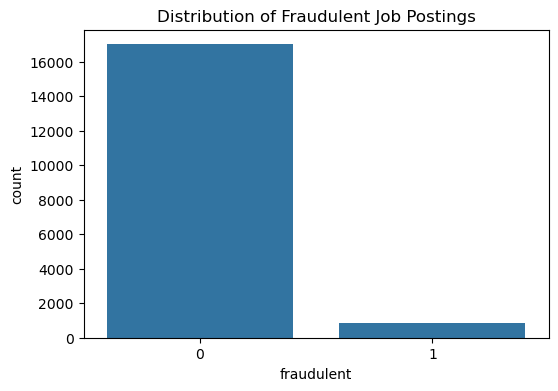

In [17]:

plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Job Postings')
plt.show()

We'll be working with class imbalance

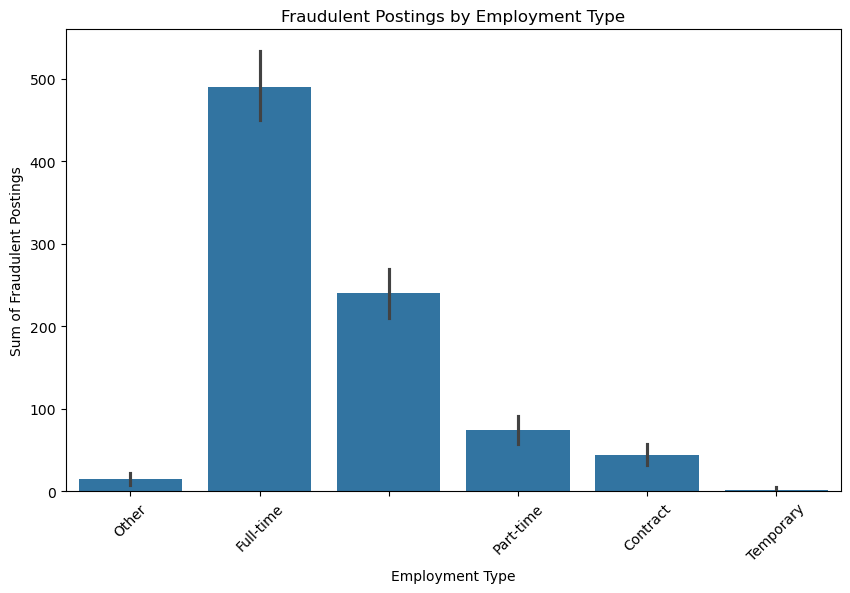

In [18]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='employment_type', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()
#plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fraud_Emp_Type.png')

Most fraudulent job postings are listed as full-time jobs.

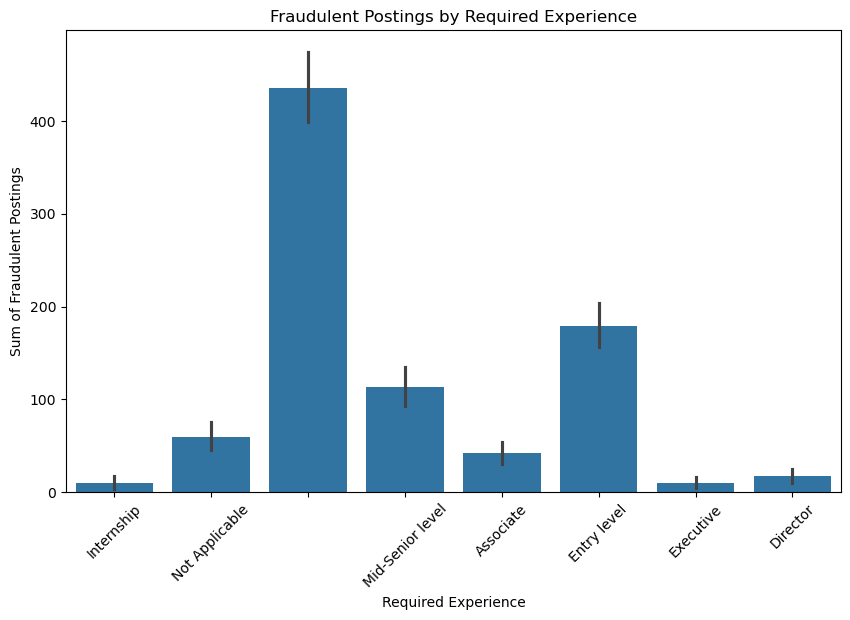

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='required_experience', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()
#plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fraud_Req_Exp.png')

Most fraudulent job postings don't specify the required experience or target entry-level candidates.

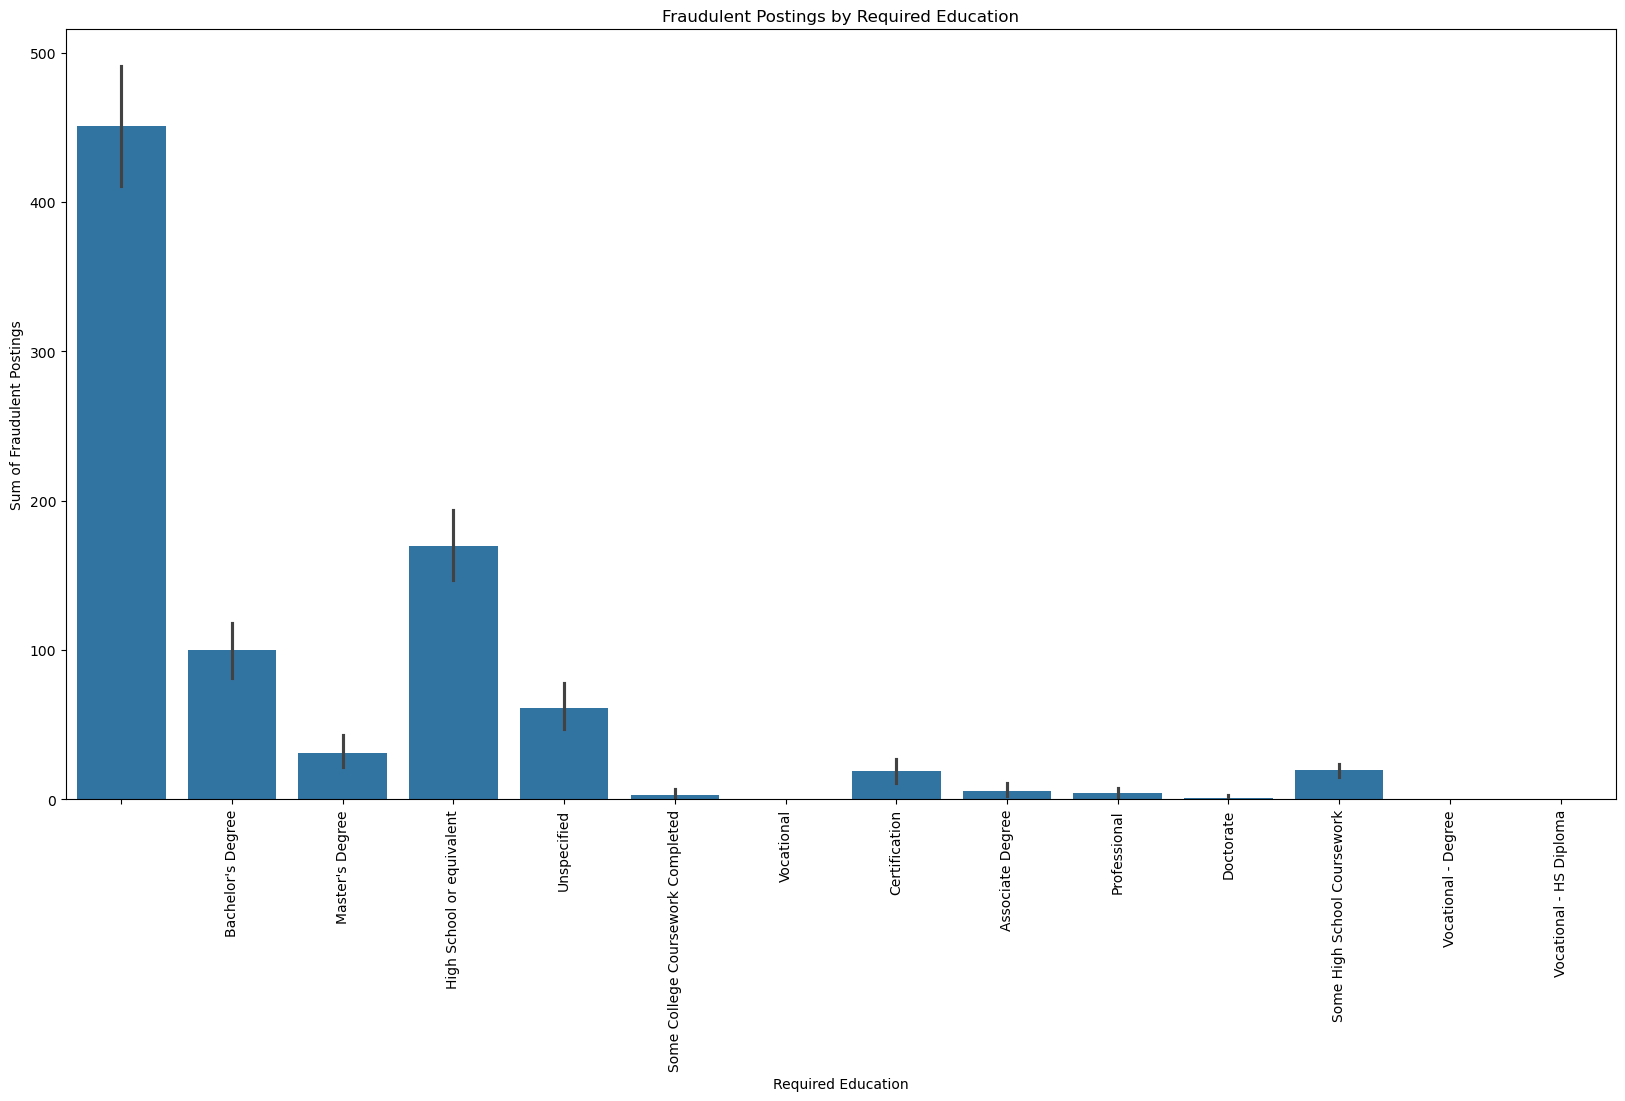

In [20]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='required_education', y='fraudulent', estimator=sum)
plt.title('Fraudulent Postings by Required Education')
plt.xlabel('Required Education')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation = 90)
plt.show()
#plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fraud_Req_Educ.png')

Most fraudulent job postings don't specify the required education or target candidates with a high school diploma or GED.

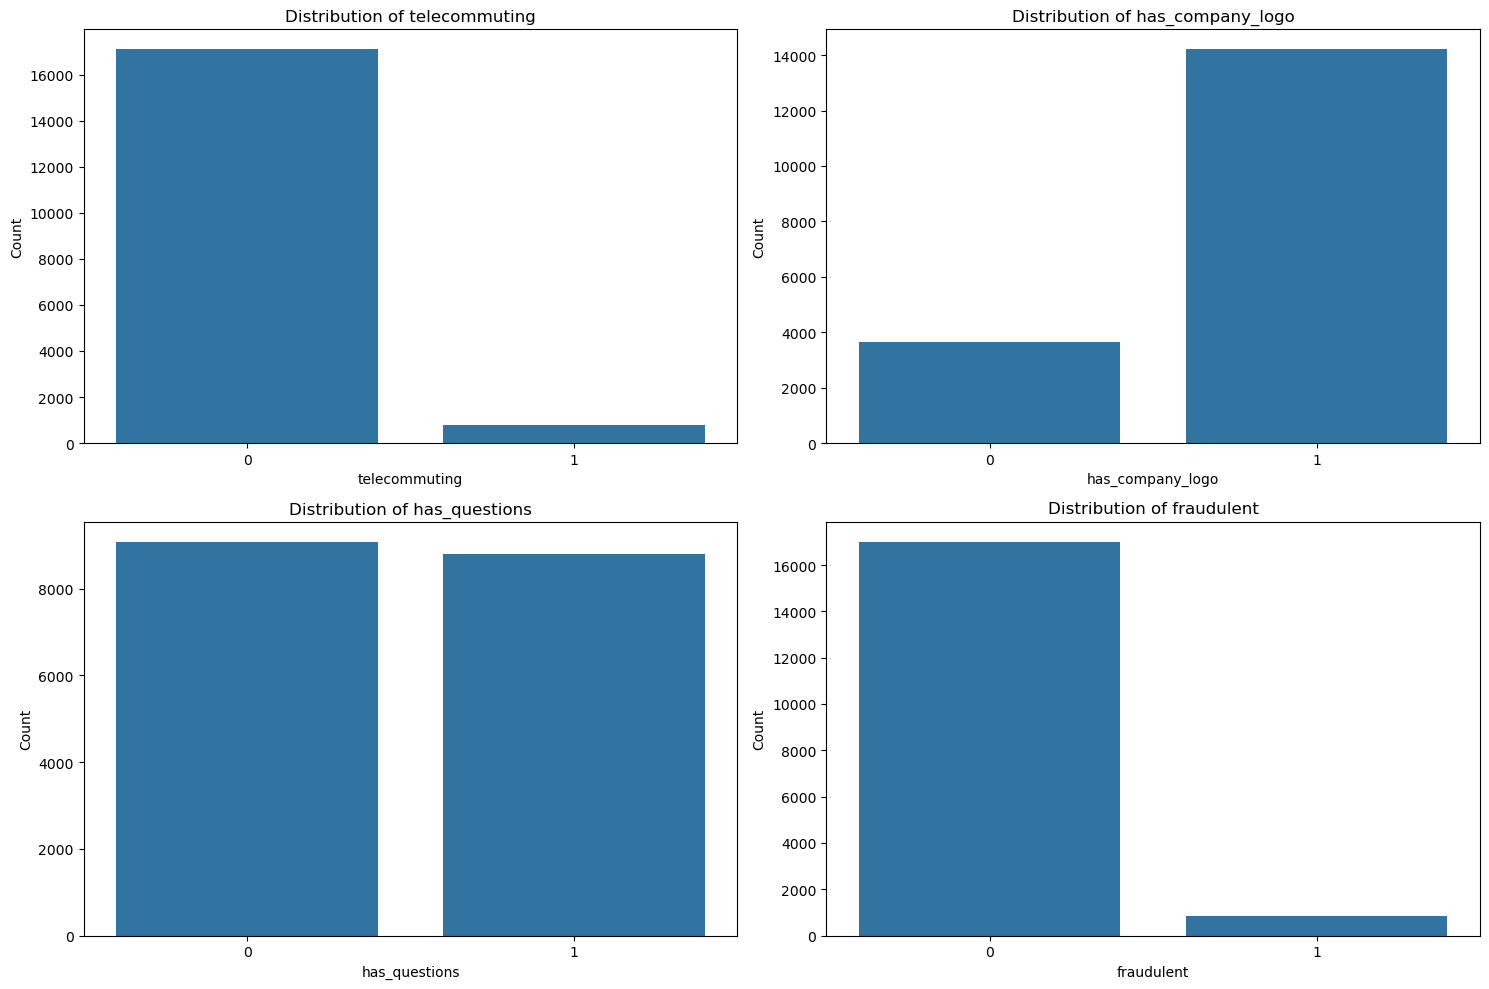

In [21]:
numerical_cols = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

# Explore distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

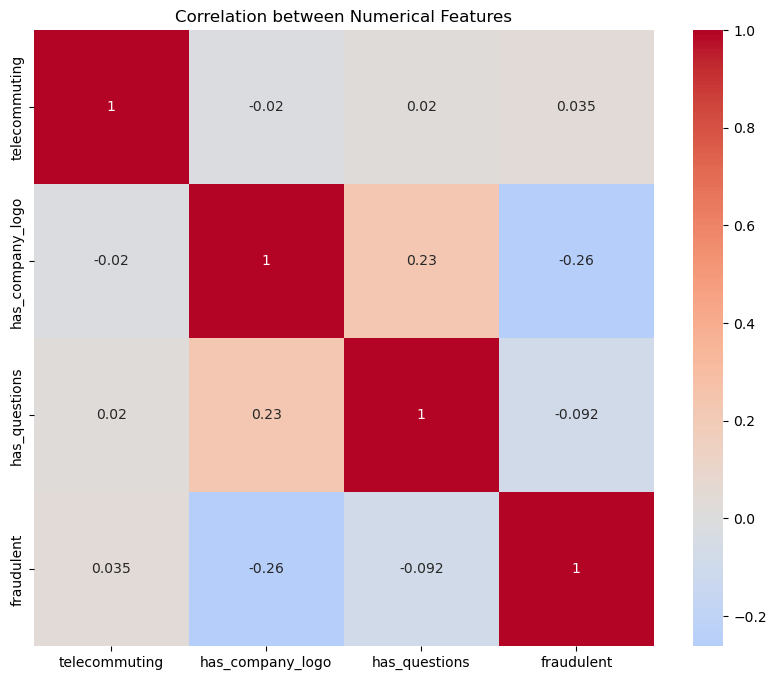

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation between Numerical Features')
plt.show()

Low correlations between the numerical features and target

In [23]:
# Explore what fraudulent job postings descriptions look like
df[df['fraudulent'] == True]['description'].iloc[0]


'IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities:\xa0Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies saf

In [24]:
df[df['fraudulent'] == True]['description'].iloc[100]


'We are a full-service marketing and staffing firm, serving companies ranging from Fortune 100 to new start-up organizations. We work with job seekers in an equally broad range, from light industrial temporary workers to executive level candidates.Are you looking for a Work from Home Opportunity where you can earn up to $2500 and more per week? Our Online Service Representative position would be perfect for you!- Set your own hours - Make money every time you decide to work - Work remotely from home - Get paid weekly - If you have a computer with internet, this is for you'

# Cleaning the Data - Text Preprocessing

In [25]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4') 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sabrinasayed/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
df.head()

title department  \
0                           Marketing Intern  Marketing   
1  Customer Service - Cloud Video Production    Success   
2    Commissioning Machinery Assistant (CMA)              
3          Account Executive - Washington DC      Sales   
4                        Bill Review Manager              

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                                 0   
1  What you will get from usThrough being part of...              0   
2                                                                 0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0                                       
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                                                           Marketing   
1                     Marketing and Advertising      Customer Service   
2                                                                       
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [27]:
df['required_experience'].value_counts()

required_experience
                    7050
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

In [29]:
import unicodedata
from collections import Counter

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Normalize unicode characters
    text = unicodedata.normalize('NFKD', text)
    
    # Remove non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    return ' '.join(tokens)

# Reapply the improved preprocessing
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for column in text_columns:
    df[column] = df[column].apply(preprocess_text)



In [30]:
df.columns

Index(['title', 'department', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [31]:
df.head()


title department  \
0                         marketing intern  Marketing   
1  customer service cloud video production    Success   
2    commissioning machinery assistant cma              
3          account executive washington dc      Sales   
4                      bill review manager              

                                     company_profile  \
0  food created groundbreaking award winning cook...   
1  second world cloud video production service se...   
2  valor service provides workforce solution meet...   
3  passion improving quality life geography heart...   
4  spotsource solution llc global human capital m...   

                                         description  \
0  food fast growing james beard award winning on...   
1  organised focused vibrant awesome passion cust...   
2  client located houston actively seeking experi...   
3  company esri environmental system research ins...   
4  job title itemization review managerlocation f...   

                                        requirements  \
0  experience content management system major plu...   
1  expect key responsibility communicate client s...   
2  implement pre commissioning commissioning proc...   
3  education bachelor master gi business administ...   
4  qualification rn license state texasdiploma ba...   

                                            benefits  telecommuting  \
0                                                                 0   
1  get usthrough part second team gain experience...              0   
2                                                                 0   
3  culture anything corporatewe collaborative cre...              0   
4                               full benefit offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0                                       
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                                                           Marketing   
1                     Marketing and Advertising      Customer Service   
2                                                                       
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

# Exploring Textual data

Create a world cloud for real and fake job postings

(-0.5, 599.5, 599.5, -0.5)

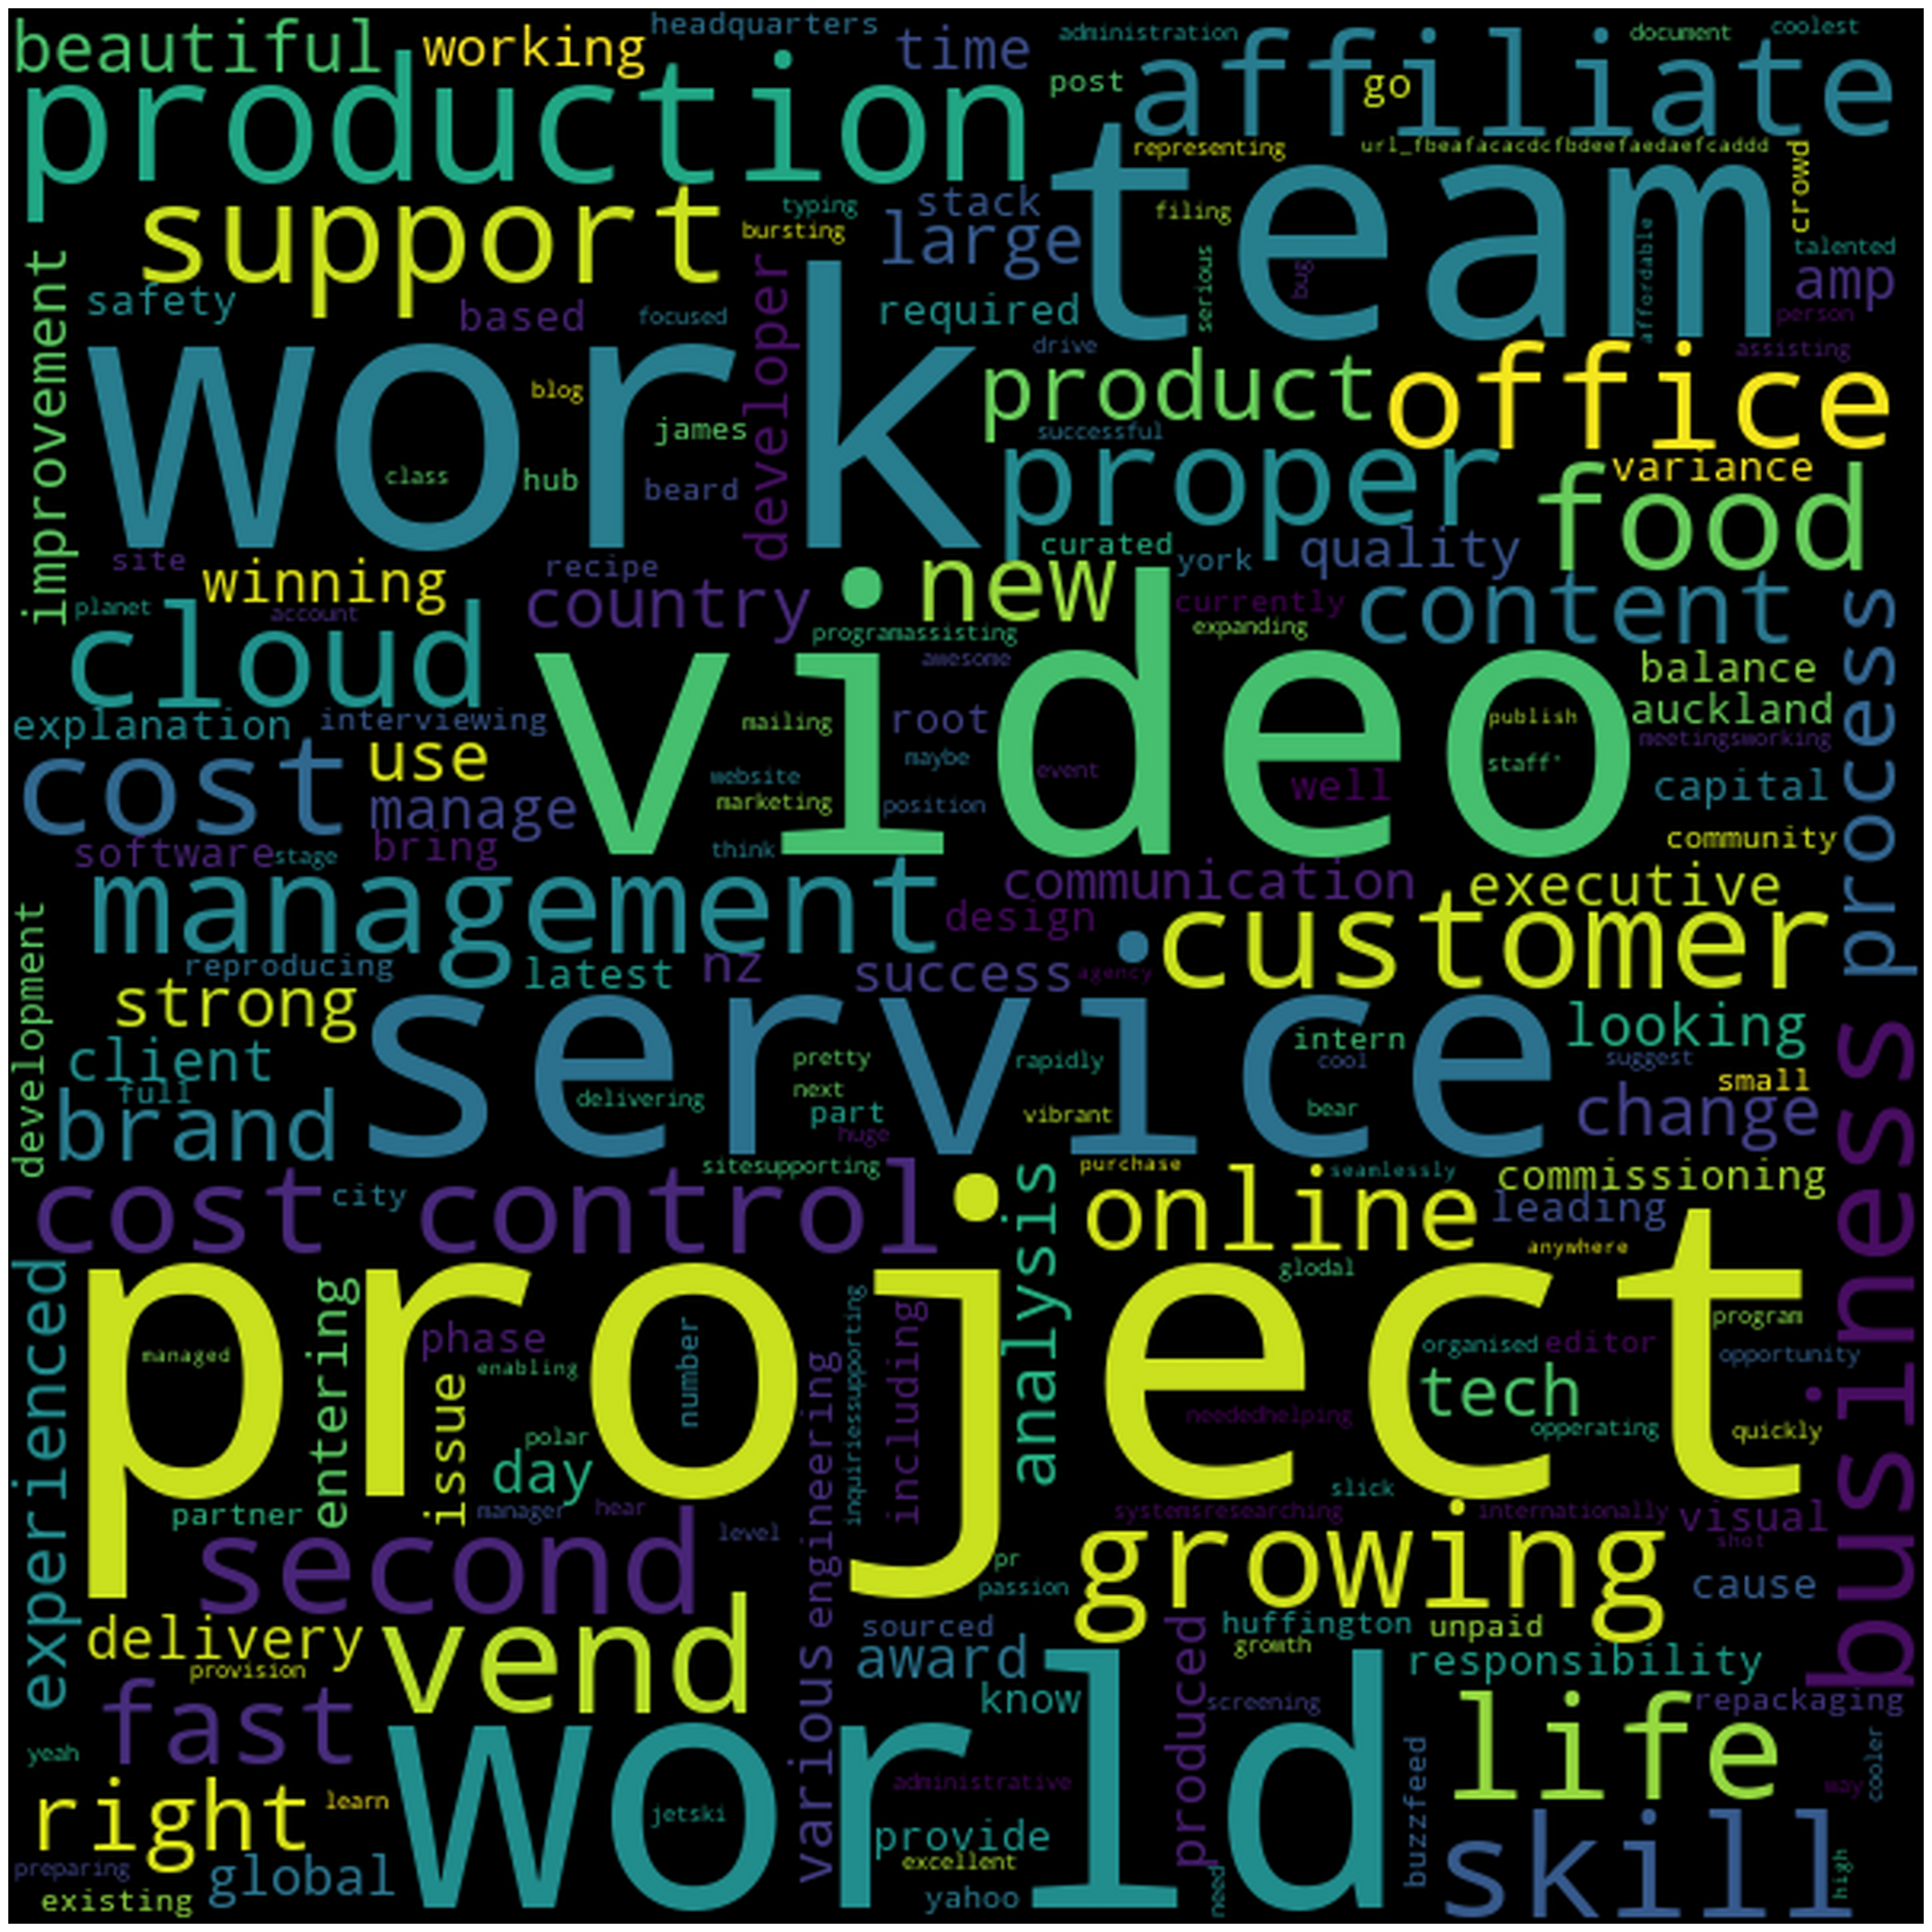

In [32]:
from nltk import ngrams
from wordcloud import WordCloud, STOPWORDS

def generate(string,ngram):
    n_grams=ngrams(word_tokenize(string),ngram)
    grams=[" ".join(val) for val in n_grams]
    return grams

real = df[df['fraudulent']==0]['description'].values
cloud = WordCloud(width= 600, height= 600, stopwords= STOPWORDS, 
                      background_color='black').generate(str(real))

fig = plt.figure(figsize = (30, 30))
plt.imshow(cloud, interpolation= 'blackman')
plt.axis('off')
#plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Real_Descr_WordCloud.png')


Text(0.5, 1.0, 'Top 10 Words in Real Job Descriptions')

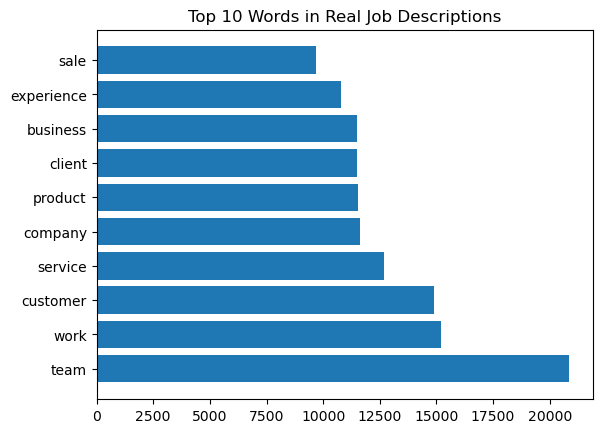

In [33]:
from collections import defaultdict
dict = defaultdict(int)

for text in df[df["fraudulent"]==0]["description"]:
    for words in generate(text,1):
        dict[words]+=1
        
word_freq=pd.DataFrame(sorted(dict.items(),key=lambda x: x[1],reverse=True))
plt.barh(word_freq[0][:10], word_freq[1][:10])
plt.title('Top 10 Words in Real Job Descriptions')
#plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Real_Descr_Top10Words.png')

(-0.5, 599.5, 599.5, -0.5)

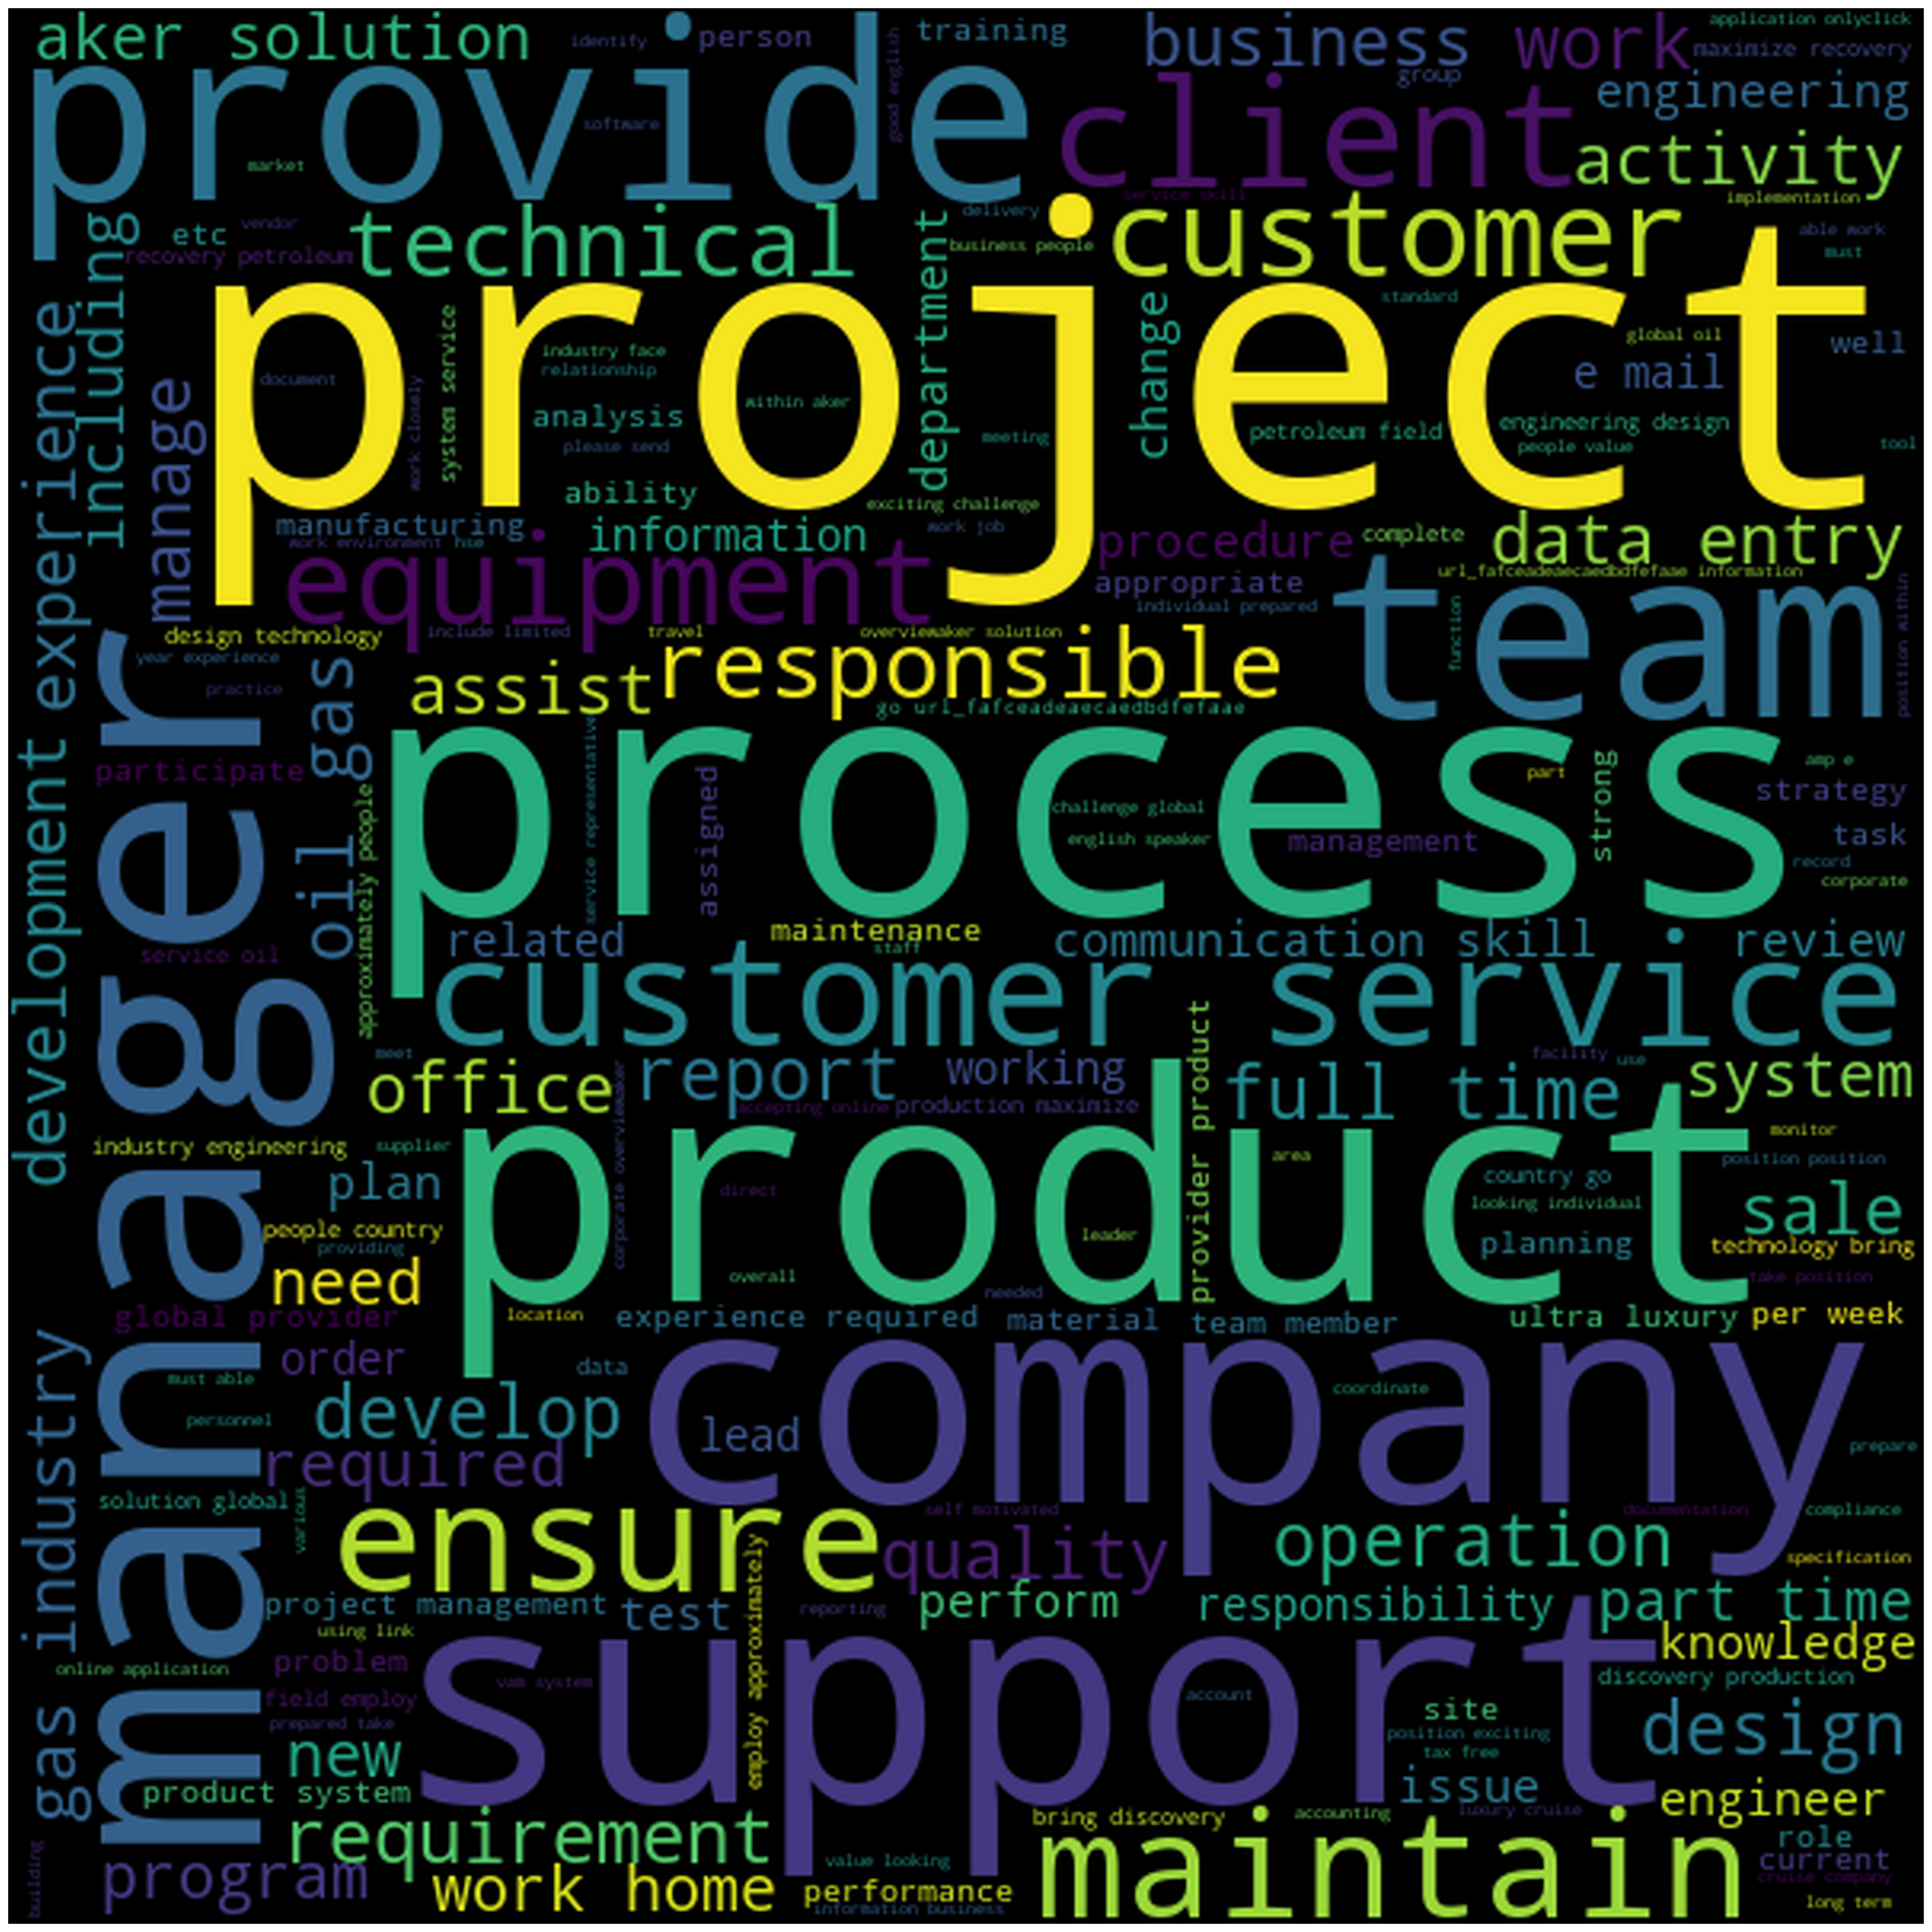

In [34]:
# Generate word cloud for fake job postings
fake = df[df['fraudulent']==1]['description'].values
cloud = WordCloud(width= 600, height= 600, stopwords= STOPWORDS, 
                      background_color='black').generate(str(fake))

fig = plt.figure(figsize = (30, 30))
plt.imshow(cloud, interpolation= 'blackman')
plt.axis('off')
#plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fake_Descr_WordCloud.png')

Text(0.5, 1.0, 'Top 10 Words in Fake Job Descriptions')

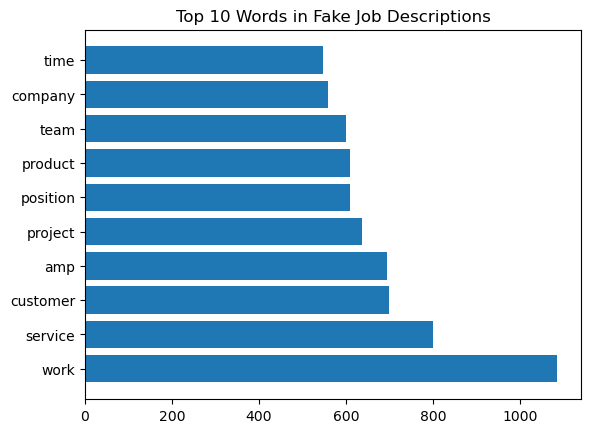

In [35]:
dict_2 = defaultdict(int)

for text in df[df["fraudulent"]==1]["description"]:
    for words in generate(text,1):
        dict_2[words]+=1
        
word_freq_2=pd.DataFrame(sorted(dict_2.items(),key=lambda x: x[1],reverse=True))
plt.barh(word_freq_2[0][:10], word_freq_2[1][:10])
plt.title('Top 10 Words in Fake Job Descriptions')
#plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Fake_Descr_Top10Words.png')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   department           17880 non-null  object
 2   company_profile      17880 non-null  object
 3   description          17880 non-null  object
 4   requirements         17880 non-null  object
 5   benefits             17880 non-null  object
 6   telecommuting        17880 non-null  int64 
 7   has_company_logo     17880 non-null  int64 
 8   has_questions        17880 non-null  int64 
 9   employment_type      17880 non-null  object
 10  required_experience  17880 non-null  object
 11  required_education   17880 non-null  object
 12  industry             17880 non-null  object
 13  function             17880 non-null  object
 14  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.0+ MB


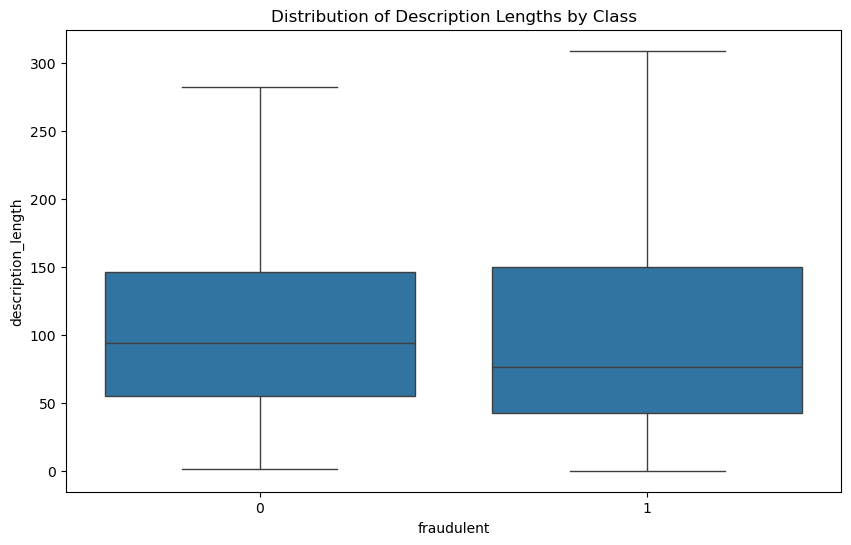

              count        mean        std  min    25%   50%    75%     max
fraudulent                                                                 
0           17014.0  110.942459  79.404995  1.0  55.00  94.0  146.0  1419.0
1             866.0  106.997691  92.527990  0.0  42.25  76.0  150.0   806.0


In [37]:
# Analyze text lengths
df['description_length'] = df['description'].str.split().str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(x='fraudulent', y='description_length', data=df,showfliers=False)
plt.title('Distribution of Description Lengths by Class')
plt.show()

# Basic statistics
print(df.groupby('fraudulent')['description_length'].describe())
#plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Descr_Lngth_ClassDist.png')

Getting most common words by class

In [38]:
import re
from collections import Counter

def check_special_chars(text_series):
    # Join all text
    all_text = ' '.join(text_series)
    # Find all non-alphabetic characters
    special_chars = re.findall(r'[^a-zA-Z\s]', all_text)
    return Counter(special_chars).most_common()

print("Special characters remaining in processed text:")
print(check_special_chars(df['description']))

Special characters remaining in processed text:
[('_', 8945)]


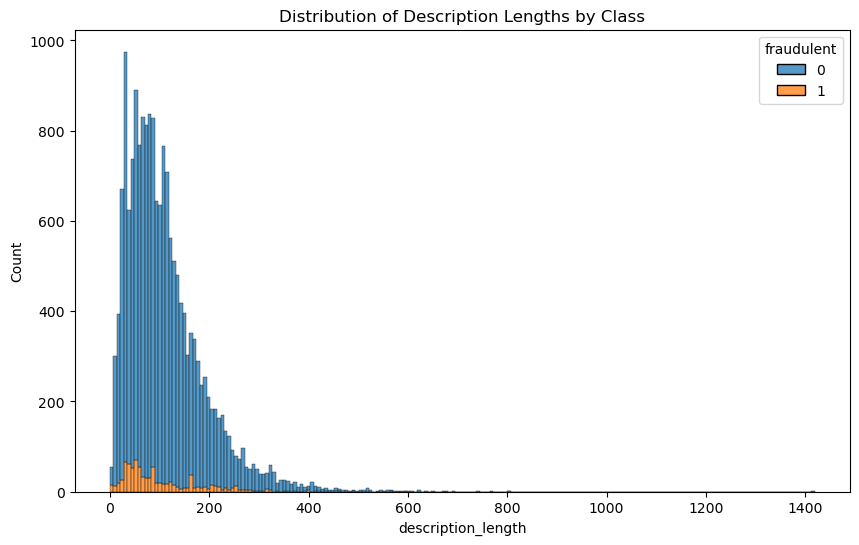

In [39]:
# Visualize the difference between the length of description for fraudulent and real job postings
plt.figure(figsize=(10, 6))
sns.histplot(df, x='description_length', hue='fraudulent', multiple='stack')
plt.title('Distribution of Description Lengths by Class')
plt.show()
#plt.savefig('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Images/Descr_Lngth_ClassDist.png')


Fradulent job postings have shorter descriptions than real job postings.

# Creating new features

In [40]:
import spacy
from textblob import TextBlob
import re
from sklearn.base import BaseEstimator, TransformerMixin

# New feature extraction functions
def extract_text_patterns(text):
    if not isinstance(text, str) or len(text.strip()) == 0:  # Check for empty strings 
        return {
            'avg_word_length': 0,
            'caps_ratio': 0,
            'url_count': 0,
            'email_pattern': 0,
            'money_pattern': 0
        }
    # Calculate average word length (with check for empty word list)
    words = text.split()
    avg_word_length = np.mean([len(word) for word in words]) if words else 0
    
    # Calculate caps ratio (with check for zero length)
    text_length = len(text)
    caps_ratio = sum(1 for c in text if c.isupper()) / text_length if text_length > 0 else 0

    return {
        'avg_word_length': avg_word_length,
        'caps_ratio': caps_ratio,
        'url_count': text.count('http'),
        'email_pattern': len(re.findall(r'[\w\.-]+@[\w\.-]+', text)),
        'money_pattern': len(re.findall(r'[\$£€]\d+', text))
    }

def extract_fraud_indicators(text):
    if not isinstance(text, str):
        return {
            'urgency_score': 0,
            'guarantee_score': 0,
            'pressure_score': 0,
            'excessive_punctuation': 0,
            'all_caps_words': 0
        }
    # Common fraud patterns
    urgency_words = ['urgent', 'immediate', 'limited time', 'act now']
    guarantee_words = ['guarantee', 'guaranteed', 'promise', 'risk-free']
    pressure_words = ['only today', 'last chance', 'exclusive offer']
    
    return {
        'urgency_score': sum(1 for word in urgency_words if word in text.lower()),
        'guarantee_score': sum(1 for word in guarantee_words if word in text.lower()),
        'pressure_score': sum(1 for word in pressure_words if word in text.lower()),
        'excessive_punctuation': len(re.findall(r'[!?]{2,}', text)),
        'all_caps_words': len(re.findall(r'\b[A-Z]{2,}\b', text))
    }

# Add features to dataframe
# Add print statements to debug
def add_sophisticated_features(df):
    text_columns = ['title', 'company_profile', 
                   'description', 'requirements', 
                   'benefits']
    
    print("Processing columns:", text_columns)
    print("Sample of first text column:", df[text_columns[0]].head())
    
    for column in text_columns:
        print(f"\nProcessing {column}")
        
        # Extract fraud indicators
        fraud_features = df[column].apply(extract_fraud_indicators)
        print(f"Fraud features extracted for {column}:", list(fraud_features.iloc[0].keys()))
        
        fraud_df = pd.DataFrame(fraud_features.tolist())
        fraud_df.columns = [f'{column}_{col}' for col in fraud_df.columns]
        
        # Add to main dataframe
        df = pd.concat([df, fraud_df], axis=1)
        
    print("\nFinal columns added:", [col for col in df.columns if 'red_flags' in col])
    return df

df = add_sophisticated_features(df)
df.head()


Processing columns: ['title', 'company_profile', 'description', 'requirements', 'benefits']
Sample of first text column: 0                           marketing intern
1    customer service cloud video production
2      commissioning machinery assistant cma
3            account executive washington dc
4                        bill review manager
Name: title, dtype: object

Processing title
Fraud features extracted for title: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']

Processing company_profile
Fraud features extracted for company_profile: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']

Processing description
Fraud features extracted for description: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punctuation', 'all_caps_words']

Processing requirements
Fraud features extracted for requirements: ['urgency_score', 'guarantee_score', 'pressure_score', 'excessive_punct

title department  \
0                         marketing intern  Marketing   
1  customer service cloud video production    Success   
2    commissioning machinery assistant cma              
3          account executive washington dc      Sales   
4                      bill review manager              

                                     company_profile  \
0  food created groundbreaking award winning cook...   
1  second world cloud video production service se...   
2  valor service provides workforce solution meet...   
3  passion improving quality life geography heart...   
4  spotsource solution llc global human capital m...   

                                         description  \
0  food fast growing james beard award winning on...   
1  organised focused vibrant awesome passion cust...   
2  client located houston actively seeking experi...   
3  company esri environmental system research ins...   
4  job title itemization review managerlocation f...   

                                        requirements  \
0  experience content management system major plu...   
1  expect key responsibility communicate client s...   
2  implement pre commissioning commissioning proc...   
3  education bachelor master gi business administ...   
4  qualification rn license state texasdiploma ba...   

                                            benefits  telecommuting  \
0                                                                 0   
1  get usthrough part second team gain experience...              0   
2                                                                 0   
3  culture anything corporatewe collaborative cre...              0   
4                               full benefit offered              0   

   has_company_logo  has_questions employment_type  ...  \
0                 1              0           Other  ...   
1                 1              0       Full-time  ...   
2                 1              0                  ...   
3                 1              0       Full-time  ...   
4                 1              1       Full-time  ...   

  requirements_urgency_score requirements_guarantee_score  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

  requirements_pressure_score requirements_excessive_punctuation  \
0                           0                                  0   
1                           0                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

   requirements_all_caps_words  benefits_urgency_score  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   benefits_guarantee_score  benefits_pressure_score  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   benefits_excessive_punctuation  benefits_all_caps_words  
0                               0                        0  
1                               0                        0  
2                               0                        0  
3                               0                        0  
4                               0                        0  

[5 rows x 41 columns]

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   title                                  17880 non-null  object
 1   department                             17880 non-null  object
 2   company_profile                        17880 non-null  object
 3   description                            17880 non-null  object
 4   requirements                           17880 non-null  object
 5   benefits                               17880 non-null  object
 6   telecommuting                          17880 non-null  int64 
 7   has_company_logo                       17880 non-null  int64 
 8   has_questions                          17880 non-null  int64 
 9   employment_type                        17880 non-null  object
 10  required_experience                    17880 non-null  object
 11  required_educat

In [43]:
# Save processed and cleaned data
df.to_csv('/Users/sabrinasayed/Documents/GitHub/Fake-Job-Posts/Data/Final_Cleaned_Data.csv', index=False)
